# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib statistics


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.0.0
aiohttp                      3.8.4
aiosignal                    1.3.1
anyio                        4.0.0
appdirs                      1.4.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.2
attrs                        23.1.0
Babel                        2.13.0
backcall                     0.2.0
bcrypt                       4.0.1
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.6.2
cachetools                   5.3.2
certifi                      2023.5.7
cffi                         1.16.0
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
comm                         0.1.4
con


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\praha\AppData\Local\Temp\ipykernel_28556\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 400 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

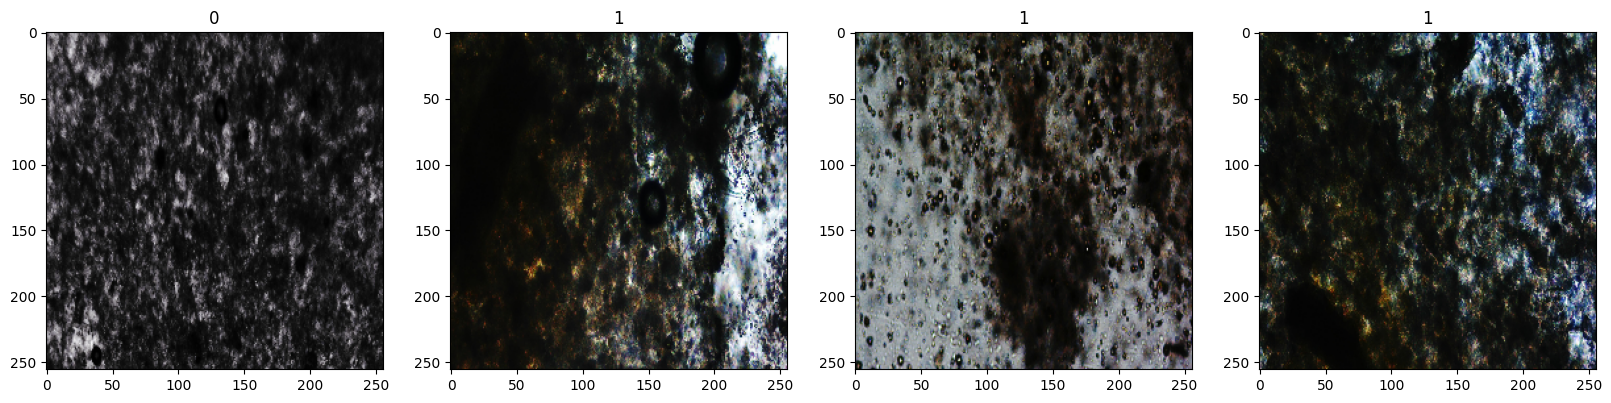

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.09166667, 0.09166667, 0.09166667],
          [0.2502451 , 0.23455882, 0.23848039],
          [0.39387256, 0.3781863 , 0.38210785],
          ...,
          [0.05931373, 0.05931373, 0.05931373],
          [0.06789216, 0.06789216, 0.06789216],
          [0.04901961, 0.04901961, 0.04901961]],
 
         [[0.20441176, 0.19656862, 0.20049019],
          [0.30294117, 0.2872549 , 0.29117647],
          [0.6887255 , 0.6730392 , 0.67696077],
          ...,
          [0.05098039, 0.05098039, 0.05098039],
          [0.09607843, 0.09607843, 0.09607843],
          [0.05245098, 0.05245098, 0.05245098]],
 
         [[0.15833333, 0.15833333, 0.15833333],
          [0.22818628, 0.22034314, 0.23210785],
          [0.58235294, 0.5745098 , 0.5862745 ],
          ...,
          [0.07377451, 0.07377451, 0.07377451],
          [0.04681373, 0.04681373, 0.04681373],
          [0.05098039, 0.05098039, 0.05098039]],
 
         ...,
 
         [[0.05661765, 0.05661765, 0.05661765],
          [0.08284

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
print(train)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Epoch 1/20


9/9 [==============================] - 36s 2s/step - loss: 0.8260 - accuracy: 0.5556 - val_loss: 0.6878 - val_accuracy: 0.5781
Epoch 2/20
9/9 [==============================] - 41s 4s/step - loss: 0.6841 - accuracy: 0.6354 - val_loss: 0.6786 - val_accuracy: 0.4844
Epoch 3/20
9/9 [==============================] - 29s 2s/step - loss: 0.6528 - accuracy: 0.6458 - val_loss: 0.5752 - val_accuracy: 0.5938
Epoch 4/20
9/9 [==============================] - 28s 3s/step - loss: 0.5172 - accuracy: 0.7639 - val_loss: 0.5135 - val_accuracy: 0.6719
Epoch 5/20
9/9 [==============================] - 12s 1s/step - loss: 0.4310 - accuracy: 0.8090 - val_loss: 0.4397 - val_accuracy: 0.7500
Epoch 6/20
9/9 [==============================] - 13s 1s/step - loss: 0.3282 - accuracy: 0.8472 - val_loss: 0.2681 - val_accuracy: 0.8906
Epoch 7/20
9/9 [===

# 8. Plot Performance

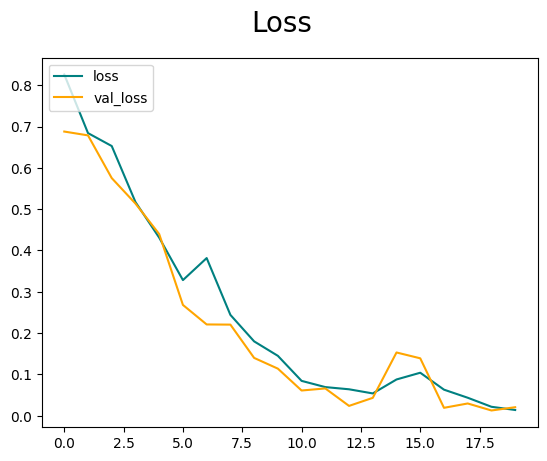

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

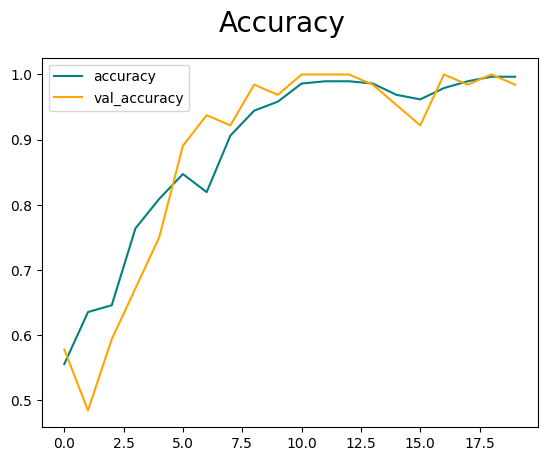

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 651ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [53]:
import cv2

<class 'numpy.ndarray'>


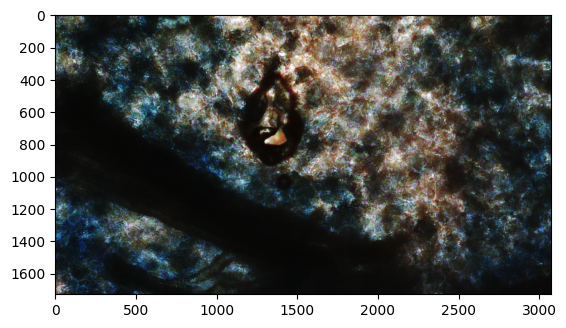

In [54]:
img = cv2.imread('moldyTest.jpg')
print(type(img))
plt.imshow(img)
plt.show()

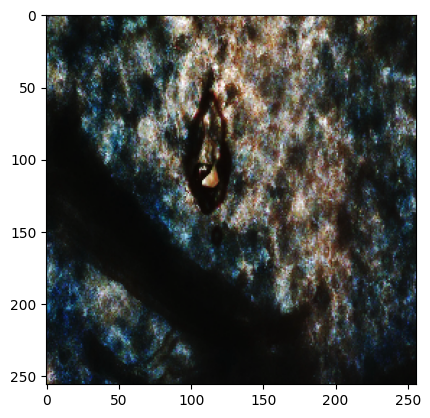

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


In [57]:
yhat

array([[0.9767747]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Unhealthy')
else:
    print(f'Predicted class is Healthy')

Predicted class is Unhealthy


# 11. Save the Model

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','imageclassifier.h5'))

In [51]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))
new_model

In [52]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 184ms/step


array([[0.9767747]], dtype=float32)